In [23]:
import xarray as xr
import numpy as np

In [24]:
files = [
    'BC_biofuel_anthropogenic_1849_2015_time_series.nc',
    'BC_fossil_anthropogenic_1849_2015_time_series.nc',
    'C2H6_anthropogenic_1849_2015_time_series.nc',
    'C3H8_anthropogenic_1849_2015_time_series.nc',
    'CH4_anthropogenic_1849_2015_time_series.nc',
    'CO_anthropogenic_1849_2015_time_series.nc',
    #'dummy_SO2_high_anthropogenic_1849_2015_time_series.nc',
    'HCHO_anthropogenic_1849_2015_time_series.nc',
    'Me2CO_anthropogenic_1849_2015_time_series.nc',
    'MeCHO_anthropogenic_1849_2015_time_series.nc',
    'MeOH_anthropogenic_1849_2015_time_series.nc',
    'NH3_anthropogenic_1849_2015_time_series.nc',
    #'NO_aircrft_anthropogenic_1849_2015_time_series.nc',
    'NO_anthropogenic_1849_2015_time_series.nc',
    'NVOC_anthropogenic_1849_2015_time_series.nc',
    'OC_biofuel_anthropogenic_1849_2015_time_series.nc',
    'OC_fossil_anthropogenic_1849_2015_time_series.nc',
    'SO2_all_low_anthropogenic_1849_2015_time_series.nc',
    'SO2_high_anthropogenic_1849_2015_time_series.nc',
    'SO2_low_anthropogenic_1849_2015_time_series.nc'
]

variables = [
    'emissions_BC_biofuel',
    'emissions_BC_fossil',
    'emissions_C2H6',
    'emissions_C3H8',
    'emissions_CH4',
    'emissions_CO',
    #'emissions_dummy_SO2_high',
    'emissions_HCHO',
    'emissions_Me2CO',
    'emissions_MeCHO',
    'emissions_MeOH',
    'emissions_NH3',
    #'emissions_NO_aircrft',
    'emissions_NO',
    'emissions_NVOC',
    'emissions_OC_biofuel',
    'emissions_OC_fossil',
    'emissions_SO2_all_low_kgSO2',
    'emissions_SO2_high_kgSO2',
    'emissions_SO2_low_kgSO2'
]
disk='/gws/nopw/j04/htap2/ptg21/OPT-emissions/constant_1995_global_ANTHRO/'

for file,vari in zip(files,variables):
    ivar=ivar+1
    names = file.split('_')
    outfile = names[0]+'_'+names[1]
    print(outfile+'\n')
    CMIP6_NO_anthro = xr.open_dataset(disk+file)
    CMIP6_NO_anthro_1995_2014 = CMIP6_NO_anthro.sel(time = slice('1994-12-01','2016-01-01'))
    CMIP6_NO_anthro_1995_data = CMIP6_NO_anthro_1995_2014.sel(time = slice('1994-12-01','1996-01-01'))[vari]
    const_1995_ems  = np.zeros((21*12+1,1,144,192))
    const_1995_ems[0,...] = CMIP6_NO_anthro_1995_data[-1,...]
    for ivar in range (0,21):
        const_1995_ems[ivar*12+1:(ivar+1)*12+1,:,:,:] = CMIP6_NO_anthro_1995_data[1:]

    CMIP6_NO_anthro_const_1995 = CMIP6_NO_anthro_1995_2014.copy(deep=True)
    CMIP6_NO_anthro_const_1995[vari].data = const_1995_ems
    CMIP6_NO_anthro_const_1995.to_netcdf('1995_2014_'+vari+'.nc')

BC_biofuel

BC_fossil

C2H6_anthropogenic

C3H8_anthropogenic

CH4_anthropogenic

CO_anthropogenic

HCHO_anthropogenic

Me2CO_anthropogenic

MeCHO_anthropogenic

MeOH_anthropogenic

NH3_anthropogenic

NO_anthropogenic

NVOC_anthropogenic

OC_biofuel

OC_fossil

SO2_all

SO2_high

SO2_low



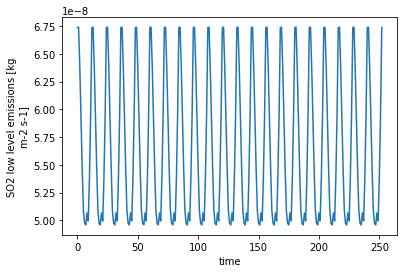

In [25]:
CMIP6_NO_anthro_const_1995[vari].resample(time='Y').sum(dim=['latitude','model_level_number','longitude']).plot()

In [27]:
files = [
    # 'BC_biofuel_anthropogenic_1849_2015_time_series.nc',
    # 'BC_fossil_anthropogenic_1849_2015_time_series.nc',
    # 'C2H6_anthropogenic_1849_2015_time_series.nc',
    # 'C3H8_anthropogenic_1849_2015_time_series.nc',
    # 'CH4_anthropogenic_1849_2015_time_series.nc',
    # 'CO_anthropogenic_1849_2015_time_series.nc',
    # #'dummy_SO2_high_anthropogenic_1849_2015_time_series.nc',
    # 'HCHO_anthropogenic_1849_2015_time_series.nc',
    # 'Me2CO_anthropogenic_1849_2015_time_series.nc',
    # 'MeCHO_anthropogenic_1849_2015_time_series.nc',
    # 'MeOH_anthropogenic_1849_2015_time_series.nc',
    # 'NH3_anthropogenic_1849_2015_time_series.nc',
    'NO_aircrft_anthropogenic_1849_2015_time_series.nc',
    # 'NO_anthropogenic_1849_2015_time_series.nc',
    # 'NVOC_anthropogenic_1849_2015_time_series.nc',
    # 'OC_biofuel_anthropogenic_1849_2015_time_series.nc',
    # 'OC_fossil_anthropogenic_1849_2015_time_series.nc',
    # 'SO2_all_low_anthropogenic_1849_2015_time_series.nc',
    # 'SO2_high_anthropogenic_1849_2015_time_series.nc',
    # 'SO2_low_anthropogenic_1849_2015_time_series.nc'
]

variables = [
    # 'emissions_BC_biofuel',
    # 'emissions_BC_fossil',
    # 'emissions_C2H6',
    # 'emissions_C3H8',
    # 'emissions_CH4',
    # 'emissions_CO',
    # #'emissions_dummy_SO2_high',
    # 'emissions_HCHO',
    # 'emissions_Me2CO',
    # 'emissions_MeCHO',
    # 'emissions_MeOH',
    # 'emissions_NH3',
    'emissions_NO_aircrft',
    # 'emissions_NO',
    # 'emissions_NVOC',
    # 'emissions_OC_biofuel',
    # 'emissions_OC_fossil',
    # 'emissions_SO2_all_low_kgSO2',
    # 'emissions_SO2_high_kgSO2',
    # 'emissions_SO2_low_kgSO2'
]
disk='/gws/nopw/j04/htap2/ptg21/OPT-emissions/constant_1995_global_ANTHRO/'

for file,vari in zip(files,variables):
    ivar=ivar+1
    names = file.split('_')
    outfile = names[0]+'_'+names[1]
    print(outfile+'\n')
    CMIP6_NO_anthro = xr.open_dataset(disk+file)
    CMIP6_NO_anthro_1995_2014 = CMIP6_NO_anthro.sel(time = slice('1994-12-01','2016-01-01'))
    CMIP6_NO_anthro_1995_data = CMIP6_NO_anthro_1995_2014.sel(time = slice('1994-12-01','1996-01-01'))[vari]
    const_1995_ems  = np.zeros((21*12+1,85,144,192))
    const_1995_ems[0,...] = CMIP6_NO_anthro_1995_data[-1,...]
    for ivar in range (0,21):
        const_1995_ems[ivar*12+1:(ivar+1)*12+1,:,:,:] = CMIP6_NO_anthro_1995_data[1:]

    CMIP6_NO_anthro_const_1995 = CMIP6_NO_anthro_1995_2014.copy(deep=True)
    CMIP6_NO_anthro_const_1995[vari].data = const_1995_ems
    CMIP6_NO_anthro_const_1995.to_netcdf('bb/1995_2014_'+vari+'.nc')

NO_aircrft

